# EDA: Online Shopping in Retail

In this project, I will be using python to explore and analyse an industry-like dataset provided by AiCore. The project has three main sections:
1. **Downloading the dataset from AWS RDS**. This part is not including in this notebook. It is executed directly on the db_utils.py file contained in the project's repository. The table is downloaded as a .csv and stored locally. This is then uploaded as a dataframe using pandas pd.read_csv built-in function.
2. **Data cleaning and pre-processing.**
3. **Data analysis and visualisation.**


---- COMPLETE INTRO HERE AND INCLUDE DICTIONARY OF COLUMN MEANINGS

In [1]:
# Import all required packages
from data_utils import DataTransform, DataFrameInfo
import missingno as msno
import numpy as np
import pandas as pd

### **Initial Exploration**

First we will load the data and do some initial exploration

In [2]:
customer_activity_df = pd.read_csv('customer_activity.csv')
print(f"The shape of the DataFrame is: {customer_activity_df.shape}")
customer_activity_df.head()

The shape of the DataFrame is: (12330, 17)


,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.0,4.0,0.0,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,26.0,876.0,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2.0,99.4,0,0.0,19.0,368.0,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0.0,0.0,0,0.0,20.0,1432.0,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0.0,0.0,0,0.0,33.0,694.0,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False


In [3]:
info_extractor = DataFrameInfo(customer_activity_df)
print(customer_activity_df.info())
print('\n', info_extractor.count_distinct_values())
print('\n', info_extractor.generate_null_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            11760 non-null  float64
 1   administrative_duration   11418 non-null  float64
 2   informational             12330 non-null  int64  
 3   informational_duration    11994 non-null  float64
 4   product_related           11751 non-null  float64
 5   product_related_duration  12129 non-null  float64
 6   bounce_rates              12330 non-null  float64
 7   exit_rates                12330 non-null  float64
 8   page_values               12330 non-null  float64
 9   month                     12330 non-null  object 
 10  operating_systems         12319 non-null  object 
 11  browser                   12330 non-null  object 
 12  region                    12330 non-null  object 
 13  traffic_type              12330 non-null  object 
 14  visito

<Axes: >

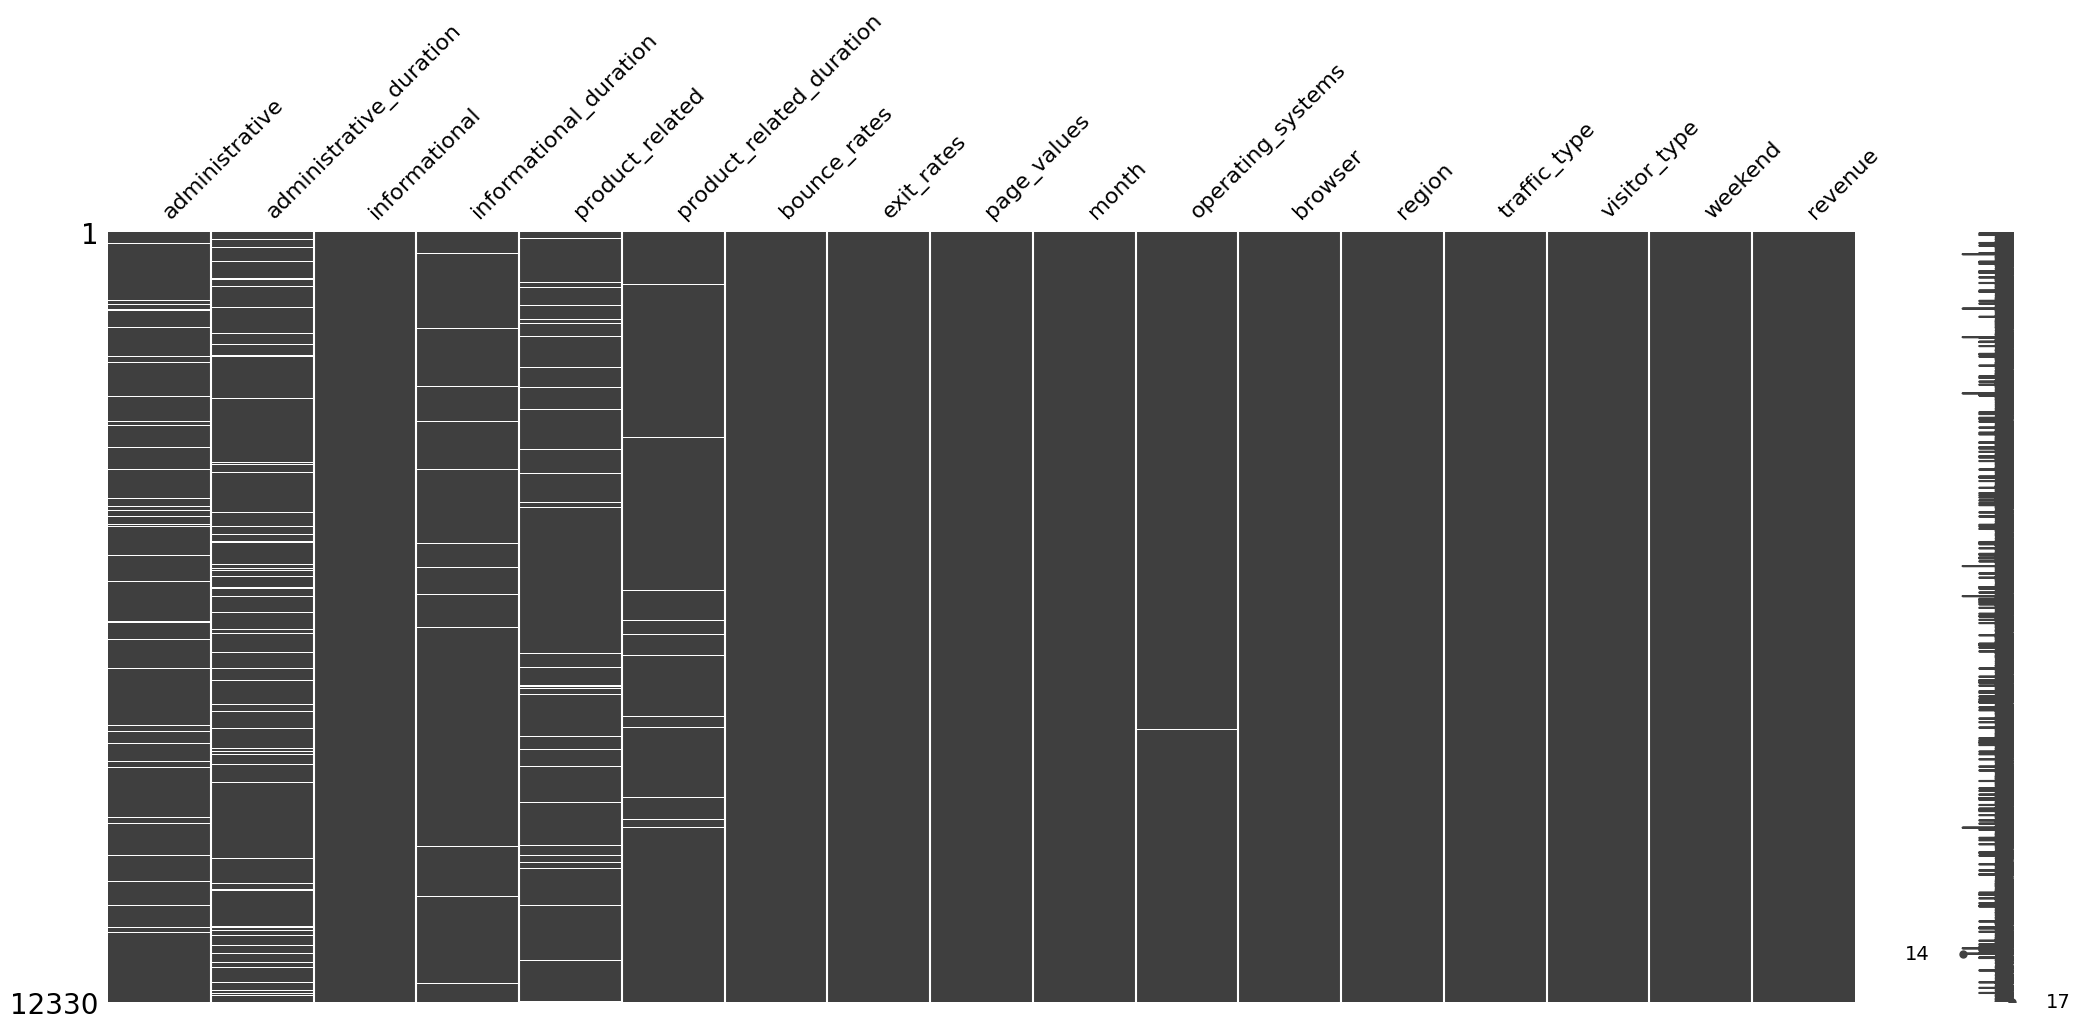

In [4]:
# Visualise missing values
msno.matrix(customer_activity_df)

In [19]:
info_extractor.show_distinct_values(['administrative','administrative_duration','browser','operating_systems'])
print("\nThe different regions in the dataset, and the number of records for each are: ")
print(customer_activity_df['region'].value_counts())

Unique values in administrative: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 23. 24. nan]
Unique values in administrative_duration: [0.00000000e+00 3.33333300e-02 5.00000000e-02 ... 2.13711274e+03
 2.15500000e+03            nan]
Unique values in browser: ['Android' 'Google Chrome' 'Internet Explorer' 'Microsoft Edge'
 'Mozilla Firefox' 'Opera' 'QQ' 'Safari' 'Samsung Internet'
 'Sogou Explorer' 'UC Browser' 'Undetermined' 'Yandex']
Unique values in operating_systems: ['Android' 'Windows' 'MACOS' 'ChromeOS' 'iOS' 'Ubuntu' nan 'Other']

The different regions in the dataset, and the number of records for each are: 
region
North America      4869
Western Europe     2283
Eastern Europe     1154
Asia               1143
South America       913
Africa              770
Northern Africa     499
Southern Africa     423
Oceania             276
Name: count, dtype: int64


### **Data Preprocessing**

In [11]:
transformer = DataTransform(customer_activity_df)

In [12]:
transformed_df = transformer.convert_month_to_period('month')
transformed_df = transformer.convert_columns(['browser','region','traffic_type','operating_systems','visitor_type'],'categorical')

transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype    
---  ------                    --------------  -----    
 0   administrative            11760 non-null  float64  
 1   administrative_duration   11418 non-null  float64  
 2   informational             12330 non-null  int64    
 3   informational_duration    11994 non-null  float64  
 4   product_related           11751 non-null  float64  
 5   product_related_duration  12129 non-null  float64  
 6   bounce_rates              12330 non-null  float64  
 7   exit_rates                12330 non-null  float64  
 8   page_values               12330 non-null  float64  
 9   month                     12330 non-null  period[M]
 10  operating_systems         12319 non-null  category 
 11  browser                   12330 non-null  category 
 12  region                    12330 non-null  category 
 13  traffic_type              12330

In [14]:
info_extractor_2 = DataFrameInfo(transformed_df)

In [10]:
transformed_df['browser'].value_counts()

browser
Google Chrome        7721
Safari               2527
Mozilla Firefox       830
Microsoft Edge        582
Internet Explorer     156
Samsung Internet      145
Opera                 136
Android               121
QQ                     53
Sogou Explorer         47
Yandex                  8
UC Browser              2
Undetermined            2
Name: count, dtype: int64

Determine which columns should be dropped
So far all missing values are: 
- OS: dropna x11 rows
- browser - undetermined only 2 - drop rows dropna

Columns to drop:
